# Monte Carlo Simulation over a S&P500 like equity investment

### Starting with 10,000 and investing an additional 10,000 annually, let's find the probability that you will have at least 1,000,000 after 30 years of investing in the S&P 500 ETF

In [124]:
# 1. import needed libraries, set plots to display in notebook

import numpy as np
from pandas import DataFrame
%matplotlib inline
import matplotlib.pyplot as plots

# allows currency formatting
import locale
locale.setlocale(locale.LC_ALL, 'en_CA.UTF-8')


'en_CA.UTF-8'

In [125]:
# 2. A traditional savings calculator approach

pv = 10000
time_horizon = 30
i =.09
additions = 10000

for year in range(time_horizon):
    ending = pv * (1+i) + additions
    print(locale.currency(ending, grouping=True))
    pv = ending




$20,900.00
$32,781.00
$45,731.29
$59,847.11
$75,233.35
$92,004.35
$110,284.74
$130,210.36
$151,929.30
$175,602.93
$201,407.20
$229,533.85
$260,191.89
$293,609.16
$330,033.99
$369,737.05
$413,013.38
$460,184.58
$511,601.20
$567,645.30
$628,733.38
$695,319.39
$767,898.13
$847,008.96
$933,239.77
$1,027,231.35
$1,129,682.17
$1,241,353.56
$1,363,075.39
$1,495,752.17


In [126]:
# 3. Generating one possible future value based on market history; I will use 9% expected return with 18% volatility

pv = 10000
expected_return = .09
volatility = .18
time_horizon = 30
annual_addition = 10000

print("\tReturn", "\t\tEnding Value".rjust(18))
for year in range(time_horizon):
    market_return = np.random.normal(expected_return, volatility)
    fv = pv * (1 + market_return) + annual_addition
    print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(locale.currency(fv, grouping=True)))
    pv = fv



	Return     		Ending Value
	0.1866               	$21,866.49
	0.2086               	$36,427.06
	0.4614               	$63,232.75
	0.2304               	$87,798.45
	-0.2213               	$78,365.09
	-0.0123               	$87,399.94
	0.2989               	$123,525.60
	-0.0319               	$129,579.57
	0.0061               	$140,368.10
	0.2063               	$179,321.46
	0.3757               	$256,697.10
	-0.0815               	$245,772.45
	-0.1162               	$227,219.04
	0.243               	$292,441.69
	0.0092               	$305,135.61
	0.2071               	$378,335.71
	0.0808               	$418,893.14
	0.1186               	$478,573.54
	0.1773               	$573,403.91
	0.3079               	$759,940.89
	-0.1623               	$646,617.18
	0.1759               	$770,352.40
	0.1163               	$869,926.71
	0.2945               	$1,136,089.75
	0.1382               	$1,303,088.27
	0.4332               	$1,877,607.60
	0.2933               	$2,438,244.49
	0.1459              

In [127]:
# 4. Simulate portfolio ending market values 

sim = DataFrame()
iterations = 5000


for x in range(iterations):
    expected_return = .09
    volatility = .18
    time_horizon = 30
    pv = 10000
    annual_investment = 10000
    stream = []
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return,volatility)) + annual_investment,2)
        
        stream.append(end)

        pv = end

    
    sim[x] = stream


In [128]:
# 5. Sample first five streams of annual ending values
first_five = list(range(5))
sim[first_five]

,0,1,2,3,4
0,21146.44,19077.35,20401.81,19925.16,20468.03
1,34364.62,35050.54,30124.42,37633.09,28588.37
2,56704.94,63543.16,44912.39,54026.29,47781.46
3,61855.34,82416.39,47945.34,52626.74,76332.35
4,61020.90,85762.78,63243.08,68860.21,84128.86
5,84717.35,108559.50,77064.95,89367.41,79395.24
6,93270.40,143387.67,96673.50,119980.42,105476.55
7,100354.48,125380.60,132329.99,122988.24,108107.87
8,109448.85,164187.37,134010.89,126547.00,118295.03
9,102246.73,180210.70,176394.78,187281.94,142688.16


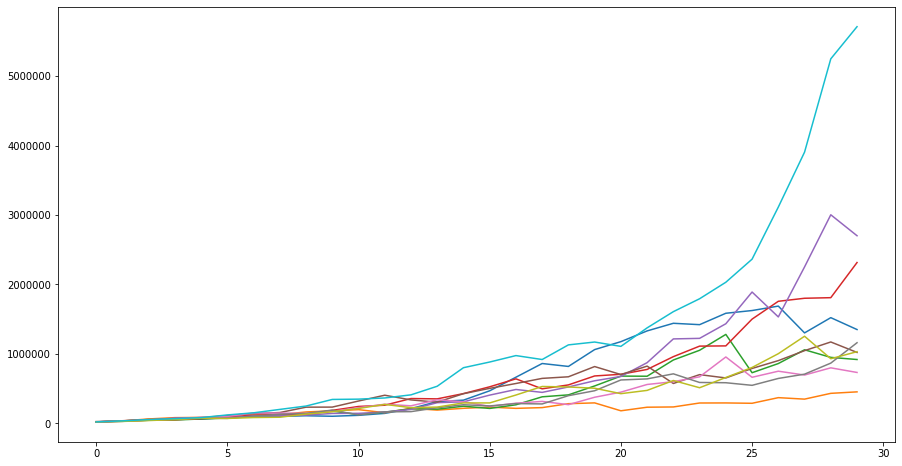

In [129]:
# 6. Plot first five simulated portfolios
ax = sim[range(10)].plot(kind='line', figsize=(15,8))
ax.get_legend().remove()

In [130]:
# 7. Generate summary statistics with numpy functions

print("Count:", len(sim.loc[29]))
print("Mean: ", locale.currency(np.mean(sim.loc[29]),grouping=True))
print("SD: ",locale.currency(np.std(sim.loc[29]),grouping=True))
print("Max: ",locale.currency(np.max(sim.loc[29]), grouping=True))
print("Min: ", locale.currency(np.min(sim.loc[29]), grouping=True))

Count: 5000
Mean:  $1,517,649.66
SD:  $1,273,659.25
Max:  $23,121,075.77
Min:  $124,690.29


In [131]:
# 8. Generating more comprehensive summary statistics with pandas describe function
ending_values = sim.loc[29]
ending_values.describe()


count    5.000000e+03
mean     1.517650e+06
std      1.273787e+06
min      1.246903e+05
25%      7.432428e+05
50%      1.196833e+06
75%      1.849973e+06
max      2.312108e+07
Name: 29, dtype: float64

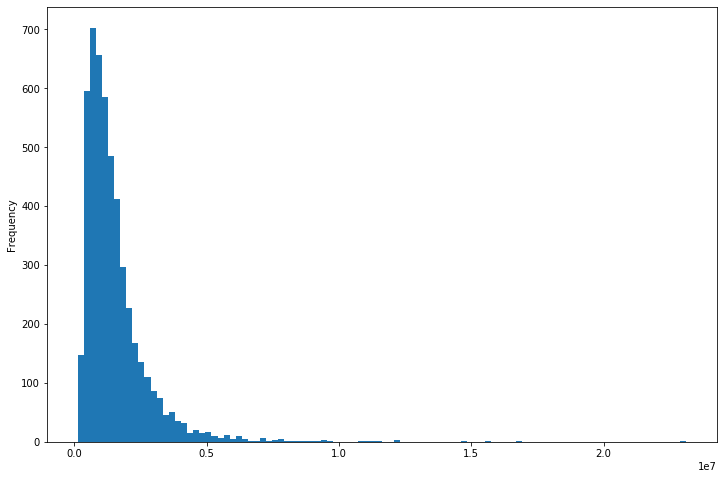

In [152]:
# 9. Get a visualization of the distribution of ending values

#plots.hist(ending_values, bins=100)
ax = ending_values.plot(kind='hist', figsize=(12,8), bins=100)
#ax.xaxis.set_ticks(np.arange(0, 3e7, 0.2e7))

In [154]:
# 10. Calculate probability of seeing a specific ending_value or less, 
# for example get close to the 75%ile, or $1,000,000

len(ending_values[ending_values<1000000]) / len(ending_values)

0.3944

In [155]:
# 11. You can't really get a point estimate, but you can get a range ending values

len(ending_values[(ending_values> 800000) & (ending_values< 1100000)]) /len(ending_values)

0.172

In [135]:
# 12. You can get a more comprehensive table of percentiles easily using numpy's percentile function

p_tiles = np.percentile(ending_values,[5,10,15,25,50,75,85,90, 95])
for p in range(len(p_tiles)):
    l = [5,10,15, 25,50,75,85,90,95]
    print( "{}%-ile: ".format(l[p]).rjust(15),"{}".format(locale.currency(p_tiles[p], grouping=True)))


       5%-ile:  $406,339.94
      10%-ile:  $507,465.50
      15%-ile:  $586,991.28
      25%-ile:  $743,242.79
      50%-ile:  $1,196,833.40
      75%-ile:  $1,849,973.04
      85%-ile:  $2,385,427.82
      90%-ile:  $2,844,432.24
      95%-ile:  $3,656,588.91
